<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Von Spannungen, Verzerrungen und Verschiebungen zu Setzungen -- indirekte Setzungsberechnungen und Verfahrensvergleiche

Ein weiteres Verfahren, das sich insbesondere bei mit der Tiefe varrierenden Baugrundeigenschaften oder bei Vorhandensein von Spannungsmessungen oder -prognosen, die nicht aus den bisher behandelten geschlossenen Lösungen resultieren, eignet, sind die indirekten Setzungsberechnungen.

In [1]:
#HIDDEN
import numpy as np #numerical methods
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import sympy as sp
from ipywidgets import widgets
from ipywidgets import interact
from ipywidgets import interactive
import pandas as pd
sp.init_printing(use_latex='mathjax') #makes sympy output look nice

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/settlements_plots.ipynb
%run plot_functions/stresses_steinbrenner_plots.ipynb

Dafür wird der Baugrund in Schichten eingeteilt. Schichtgrenzen können bspw.

* geologisch vorgegeben sein;
* aus spannungsabhängigen Steifigkeitsänderungen resultieren;
* veränderliche Lagerungsdichten oder Konsistenzen widerspiegeln;
* durch die Berücksichtigung von Grundwasserständen (Wichte unter Auftrieb) notwendig werden.

Für jede Schicht wird mit Bezug auf ihre mittlere Tiefe

* die vertikale Überlagerungseffektivspannung vor Beginn der Baumaßnahme bestimmt;
* die effektive Vertikalspannungserhöhung infolge der Baumaßnahme ermittelt (bspw. über die Methode der $i$ Beiwerte);
* der zur Ausgangsspannung und zum Spannungszuwachs gehörige Streifemodul als Sekantenmodul aus Druck-Setzungskurven bestimmt und daraus der Rechenmodul abgeleitet. 

Mit diesen Informationen kann für jede Schicht die Zusammendrückung (Teilsetzungsbeitrag) mittels

$$
    \Delta s_i = \frac{\Delta \sigma'_i}{E^*_i(\sigma'_{0,i},\Delta \sigma'_i)} h_i
$$

ermittelt werden.

Die Gesamtsetzung ergibt sich durch Summation über alle $n$ Schichten:

$$
    s = \sum \limits_{i=1}^n \Delta s_i
$$

## Vergleichende Analyse

Wir berechnen nun die Setzungen unter dem kennzeichnenden Punkt einer gleichförmigen Vertikalflächenlast $q_0 = 300\,$kPa mit Wirkungsfläche $6 \times 4\,$m², die aufgrund der Kompression einer 25 m mächtigen Schicht entstehen. Die Einbindetiefe $d$ sei Null. Die normalkonsolidierte Bodenschicht sei durch eine spannungsabhängige Steifigkeit (Tangentenmodul) gekennzeichnet:

$$
    E_\text{s} = E_\text{ref} \left(\frac{\sigma'}{\sigma_\text{ref}}\right)^{\omega_\text{e}}
$$

wobei wir $E_\text{ref} = E_\text{s}(\sigma_\text{ref} = 10\,\text{kPa}) = 1\,\text{MPa}$ und $\omega_\mathrm{e} = 0.9$ setzen. Für alle Berechnungen verwenden wir $\nu = 0$ (Querkontraktionszahl) und die Wichte $\gamma = 16\,$kN$\,$m$^{-3}$. Das Spannungs-Dehnungsverhalten (Erstbelastung) sowie den Tangentensteifemodul stellt die folgende Abbildung dar.

In [2]:
#HIDDEN
E_s = lambda sig, Eref, sigref, om: Eref * np.power(sig/sigref,om) #kPa
eps = lambda sig, Eref, sigref, om: sigref*np.log(sig/sigref)/Eref if om == 1 else sigref/((1-om)*Eref) * ( np.power(sig/sigref,1-om) -1 )
loopifier = lambda w: w*(1-w) * 0.005

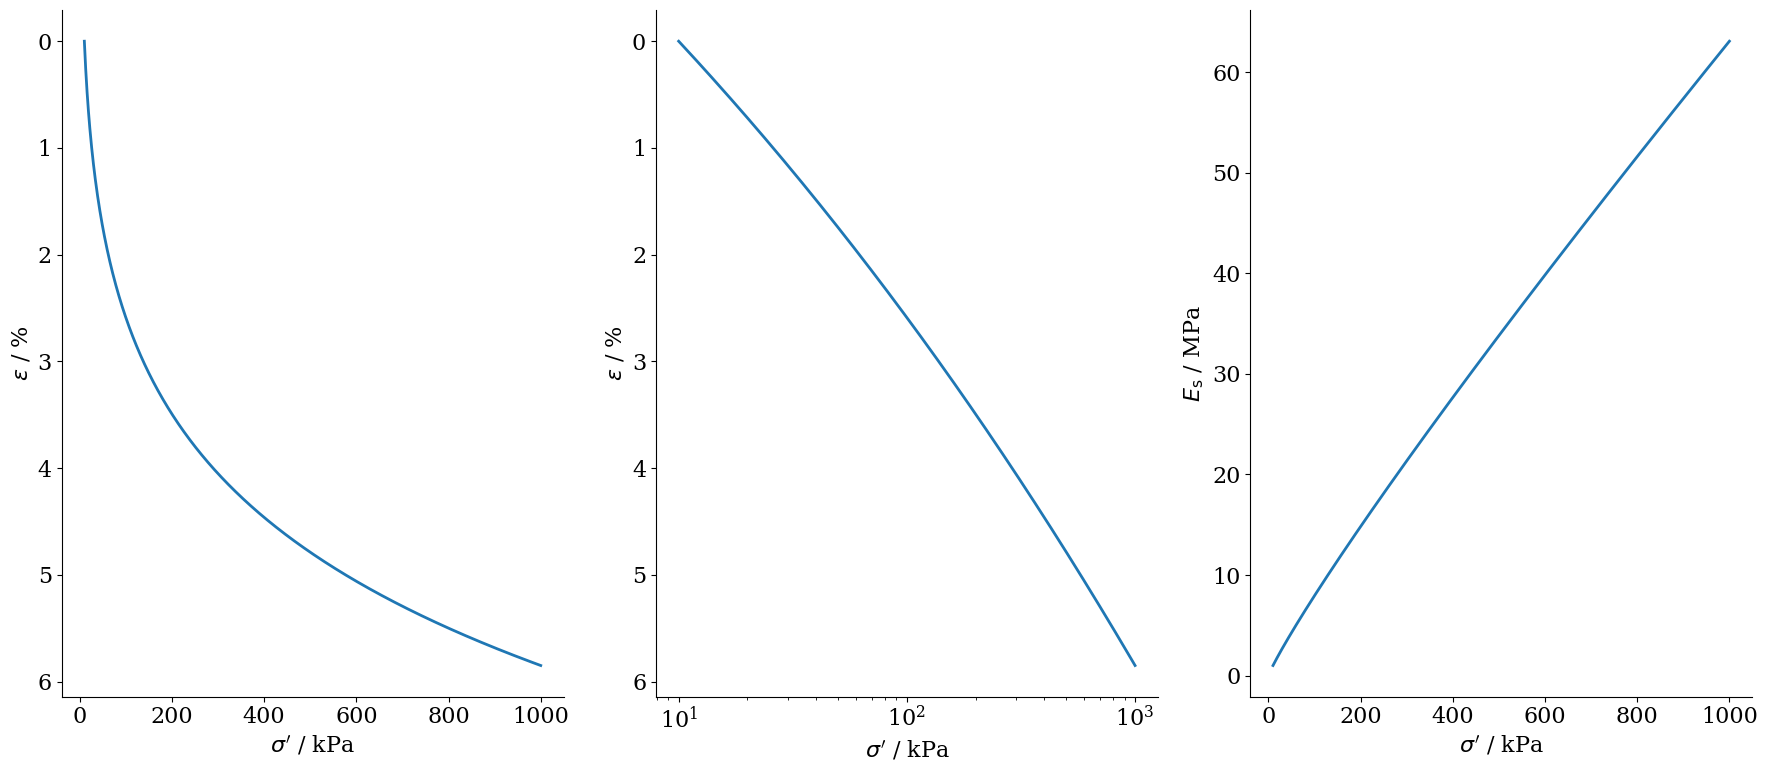

In [3]:
#HIDDEN
gamma = 16.
q0 = 300.
ts = 25.
a = 6.
b = 4.
plot_stiffness_input()

In [4]:
#HIDDEN
interactive_secant()

interactive(children=(BoundedFloatText(value=100.0, description='$\\sigma_0$ / kPa', max=1000.0, min=10.0), Bo…

Die linke Graphik kann verwendet werden, um Sekantenmodule für bestimmte Spannungsintervalle abzuleiten. Im Folgenden wird die explizite Ausweisung effektiver Spannungen der Einfachheit halber wieder vernachlässigt.


### Aushub bzw. Einbindetiefe

Die Setzung kann bei nicht-monotoner Belastung aus verschiedenen Anteilen bestehen. Teilt man den Vorgang auf die setzungserzeugenden Anteile Entlastung (Hebung), Wiederbelastung und Erstbelastung, ergeben sich die Setzungen additiv wie folgt:

$$
    s = -\int \limits_{z_1}^{z_2} \frac{\Delta \sigma'_\text{Ent}}{E^*_\text{Ent}}\,\text{d}z 
    + \int \limits_{z_1}^{z_2} \frac{\Delta \sigma'_\text{W}}{E^*_\text{W}}\,\text{d}z
    + \int \limits_{z_1}^{z_2} \frac{\Delta \sigma'_\text{E}}{E^*_\text{E}}\,\text{d}z
$$

Gemäß der obigen Abbildung wird oft $s_\text{Ent} = s_\text{W}$ gesetzt und die setzungserzeugenden Anteile werden aus dem Erstbelastungsanteil ermittelt. Ein Beispiel für dieses Vorgehen ist die Berücksichtigung der Einbindetiefe von Fundamenten. Dazu betrachte man den Fall der Hebungen infolge Aushubs und der anschließenden Wiederbelastung durch Sohlspannungen entsprechend der folgenden Abbildung.

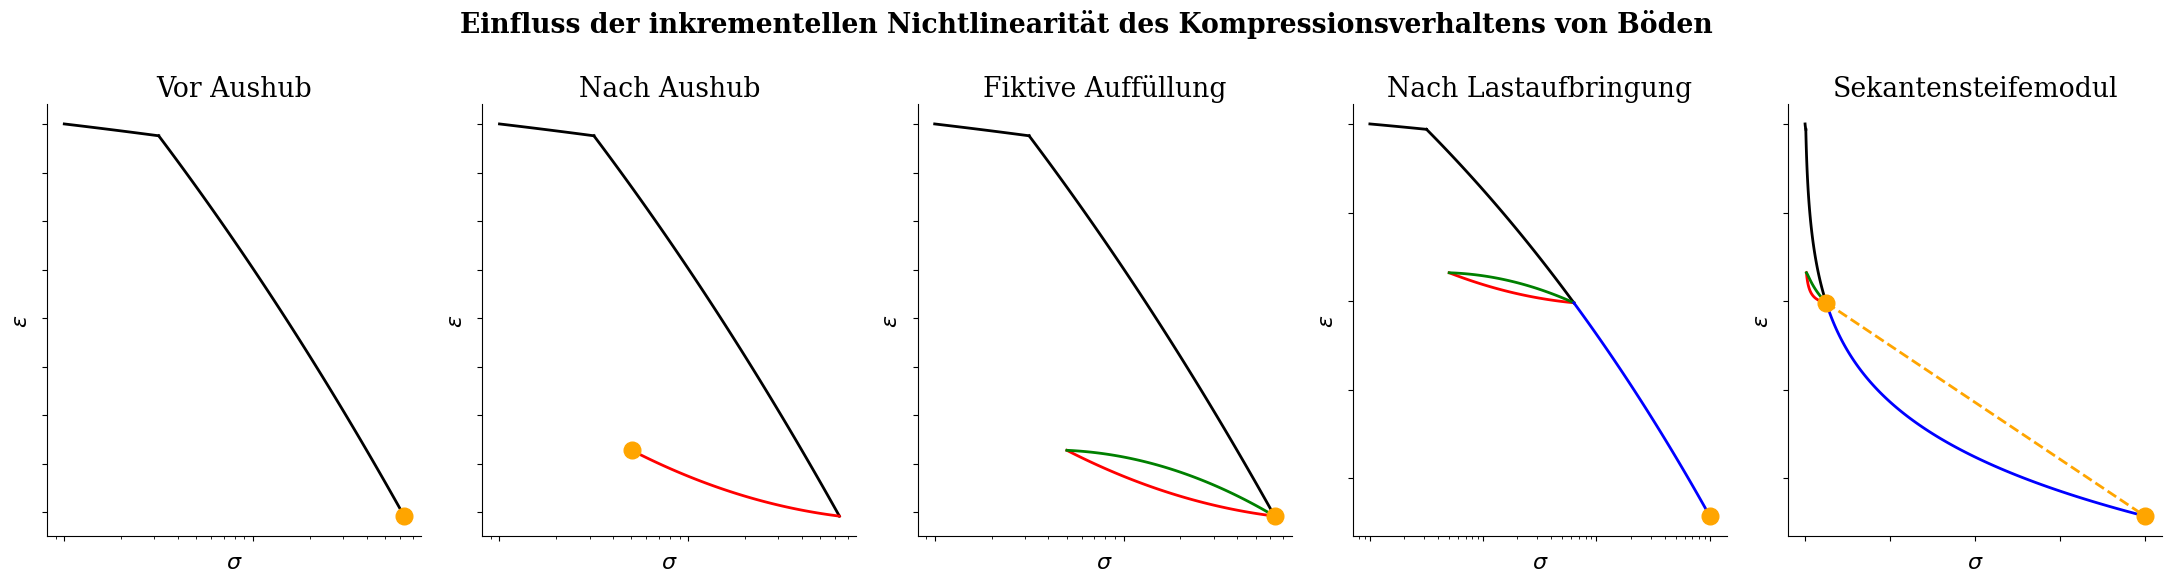

In [5]:
#HIDDEN
plot_aushub()

Praktisch geht man dafür wie folgt vor. Soll eine Einbindetiefe $d$ berücksichtigt werden, so ist die Verminderung der Sohlspannung um die Eigengewichtslast des Aushubs maßgebend: $q_1 = q_0 - \gamma_d d$. Die Ausgangsspannungen berechnen sich dann zu $\sigma_0 = \gamma (z + d)$, wobei $z$ seinen Nullpunkt in der Sohlfuge hat ($d$ unterhalb ursprünglicher GOK). Die Zusatzspannungen leiten sich aus den bisherigen Formeln ab, indem $q_0$ durch die effektive Sohlpressung $q_1$ ersetzt wird. 

Man beachte, dass Verformungen aufgrund des Eigengewichts i.d.R. nicht berücksichtigt werden. Die Verzerrungen beziehen sich in situ auf die Ausgangsmächtigkeiten. Müssen bis zu den entsprechenden Spannungen im Ödometer bereits große Stauchungen aufgebracht werden und sind diese auf die Ausgangsprobenhöhe bezogen, so kann es sinnvoll sein, bei der Auswertung der Ödometerversuche die Ausgangshöhe auf den Wert zu Beginn der setzungsbeschreibenden Laststufe zu korrigieren, sprich den Nullpunkt entsprechend der Gegebenheiten in situ zu wählen.

### Methode 1: Direkte Methode -- konstanter Steifemodul -- eine Schicht

Wir berechnen die Setzung mit der bereits bekannten Formel

$$
    s_\text{K} = \frac{q_0bf_\text{K}}{E^*}
$$

Die folgende Abbildung illustriert zunächst die Abweichung des Sekantenmoduls und der Tangentenmoduln bei Ausgangs- und Endbelastung sowie bei der mittleren Belastung über der Tiefe.

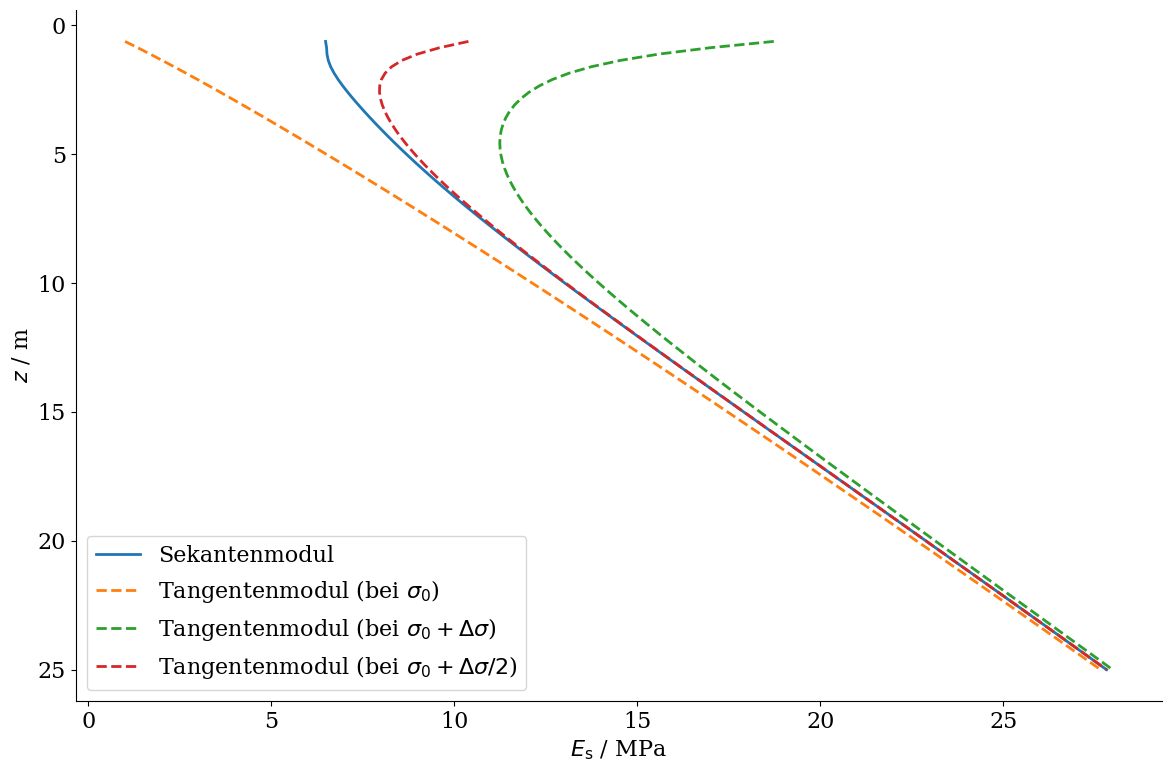

In [6]:
#HIDDEN
#%run plot_functions/settlements_plots.ipynb
plot_secant_tangent()

Zur Berechnung setzen wir vergleichsweise zwei unterschiedliche Sekantenmoduln an. Insbesondere wählen wir

* den Bezug auf die Schichtmitte (Standardregel): $E^* = E_\text{s}^\text{sec}\left[\sigma_0 = \gamma \frac{t}{2}, \Delta \sigma = q_0 i_\text{K}\left(z = \frac{t}{2}\right)\right]$
* den Bezug auf das obere Viertel der Schicht: $E^* = E_\text{s}^\text{sec}\left[\sigma_0 = \gamma \frac{t}{4}, \Delta \sigma = q_0 i_\text{K}\left(z = \frac{t}{4}\right)\right]$. Die Überlegung dazu leitet sich aus der mit 25 m sehr hohen Schichtdicke ab, die eine starke Konzentration der setzungsrelevanten Spannungszuwächse auf den oberen Bereich der Schicht nahelegt.

In [7]:
#HIDDEN
E_mid = get_secant(gamma*ts/2,q0*i_K_Rechteck(ts/2,a,b))
E_top = get_secant(gamma*ts/4,q0*i_K_Rechteck(ts/4,a,b))
print("Der Steifemodul (Sekante) mit Bezug zur Schichtmitte (%.1f m Tiefe) beträgt %.2f MPa" %(ts/2,E_mid/1e3))
print("Der Steifemodul (Sekante) mit Bezug zum oberen Schichtviertel (%.1f m Tiefe) beträgt %.2f MPa" %(ts/4,E_top/1e3))

Der Steifemodul (Sekante) mit Bezug zur Schichtmitte (12.5 m Tiefe) beträgt 15.43 MPa
Der Steifemodul (Sekante) mit Bezug zum oberen Schichtviertel (6.2 m Tiefe) beträgt 9.67 MPa


In [8]:
#HIDDEN
sK_mid = q0*b/E_mid * fK(ts,a,b,0)
sK_top = q0*b/E_top * fK(ts,a,b,0)
print("Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zur Schichtmitte beträgt %.2f cm" %(sK_mid*100))
print("Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zum oberen Schichtviertel beträgt %.2f cm" %(sK_top*100))

Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zur Schichtmitte beträgt 7.23 cm
Die Setzung unter Verwendung des Steifemoduls (Sekante) mit Bezug zum oberen Schichtviertel beträgt 11.54 cm


### Methode 2 -- Direkte Methode -- Berechnung mit Teilschichten

Zur besseren Berücksichtigung der Nichtlinearität des Bodenverhaltens wird der Baugrund nun in $n$ Schichten eingeteilt. Bei der direkten Methoden kommt dann folgende Formel zur Anwendung:

$$
    s = q_1 b \left( \frac{f_1}{E_1^*} + \sum \limits_{i=2}^n \frac{f_i - f_{i-1}}{E_i^*} \right)
$$

Wir berechnen dann die Setzungsbeiwerte $f_i$ für die Schichtunterkanten und verwenden die Sekantensteifemoduln in den Schichtmitten als Rechenmoduln $E_i^*$. Die folgende interaktive Tabelle verdeutlicht den Rechenablauf und dient der Einschätzung des Einflusses der Schichtenanzahl auf die Setzungsbeträge (Achtung: die Zählung beginnt in der Tabelle abweichend zur obigen Formel bei 0).

Zusätzlich kann hier noch die Einbindetiefe berücksichtigt werden.

**Aufgabe:** Wie viele Schichten sind als Einteilung in diesem Beispiel sinnvoll? Wie könnte man die Genauigkeit bei einer geringen Anzahl von Schichten durch eine veränderte Wahl der Schichtgrenzen weiter verbessern? Weisen Sie Ihre Hypothese für $n=3$ per Handrechnung nach.

**Aufgabe:** Welchen Einfluss hat die Variation der Einbindetiefe? Begründen Sie Ihre Beobachtung bodenmechanisch.

In [9]:
#HIDDEN
interactive_direct_layers()

interactive(children=(IntSlider(value=3, description='$n$', max=15, min=1), FloatSlider(value=0.0, description…

### Methode 3 -- Indirekte Methode -- Berechnung mit Teilschichten

Wir verwenden nun die Formel

$$
    s = \sum \limits_{i=1}^n \frac{\Delta \sigma'_i}{E^*_i(\sigma'_{0,i},\Delta \sigma'_i)} h_i
$$

zur Setzungsberechnung. Der Ablauf folgt einem ähnlichen Schema wie Methode 2. Die Spannungszuwächse in den Schichtmitten ermitteln wir mittels

$$
    \Delta \sigma_i = q_1 i_\text{K}(z=z_\text{m})
$$

**Aufgabe:** Wie viele Schichten sind als Einteilung in diesem Beispiel sinnvoll? Worin liegt der Unterschied begründet? Weisen Sie auch hier ihre Hypothese zur Schichteinteilung durch Handrechnung nach. Verwenden Sie dazu $n=5$.

In [10]:
#HIDDEN
#%run plot_functions/settlements_plots.ipynb
interactive_indirect_layers()

interactive(children=(IntSlider(value=3, description='$n$', max=15, min=1), FloatSlider(value=0.0, description…

### Ergänzung: Zum Steifemodul in den Übungsaufgaben

*Frage Linda G.:* "Wie berechne ich die Sekantenmoduln in den Tabellen, wenn ich $\Delta \epsilon$ doch gar nicht kenne?"

Der Tangentenmodul

$$
    E_\text{s} = \frac{\text{d}\sigma'}{\text{d}\epsilon} = E_\text{ref} \left(\frac{\sigma'}{\sigma_\text{ref}}\right)^{\omega_\text{e}}
$$

kann durch Integration zwischen dem Ausgangs- und dem belasteten Zustand in einen Sekantenmodul überführt werden. Dazu nutzen wir die folgenden definitionsgemäßen Zusammenhänge

$$
    E_\text{s}^\text{sec} = \frac{\Delta \sigma}{\Delta \epsilon} = \frac{\int \limits_{\sigma_0}^{\sigma_0 + \Delta \sigma} \text{d}\sigma}{\int \limits_{\epsilon_0}^{\epsilon_0 + \Delta \epsilon} \text{d}\epsilon}
$$

Um das zum Spannungsinkrement gehörige Stauchungsinkrement zu berechnen, formen wir das entsprechende Integral unter Verwendung der Definition des Tangentenmoduls auf ein Spannungsintegral um:

\begin{align}
    \int \limits_{\epsilon_0}^{\epsilon_0 + \Delta \epsilon} \text{d}\epsilon &= \int \limits_{\sigma_0}^{\sigma_0 + \Delta \sigma} E_\text{s}^{-1} \text{d}\sigma
    \\
    &= \int \limits_{\sigma_0}^{\sigma_0 + \Delta \sigma} E_\text{ref}^{-1} \left(\frac{\sigma'}{\sigma_\text{ref}}\right)^{-\omega_\text{e}} \text{d}\sigma
    \\
    &=
    \begin{cases}
    \frac{\sigma_\text{ref}}{(1-\omega_\text{e})E_\text{ref}} \left[ \left(\frac{\sigma'}{\sigma_\text{ref}}\right)^{1-\omega_\text{e}} \right]_{\sigma_0}^{\sigma_0+\Delta \sigma} & \text{if } \omega_\text{e} \neq 1
    \\
    \frac{\sigma_\text{ref}}{E_\text{ref}} \left[ \ln \left(\frac{\sigma'}{\sigma_\text{ref}}\right) \right]_{\sigma_0}^{\sigma_0+\Delta \sigma} & \text{if } \omega_\text{e} = 1
    \end{cases}
    \\
    &=
    \begin{cases}
    \frac{\sigma_\text{ref}}{(1-\omega_\text{e})E_\text{ref}} \left[ \left(\frac{\sigma_0+\Delta \sigma}{\sigma_\text{ref}}\right)^{1-\omega_\text{e}} - \left(\frac{\sigma_0}{\sigma_\text{ref}}\right)^{1-\omega_\text{e}} \right] & \text{if } \omega_\text{e} \neq 1
    \\
    \frac{\sigma_\text{ref}}{E_\text{ref}} \ln \left(\frac{\sigma_0+\Delta \sigma}{\sigma_0}\right) & \text{if } \omega_\text{e} = 1
    \end{cases}
\end{align}

Damit ergibt sich für den Sekantenmodul folgender Ausdruck:

$$
    E_\text{s}^\text{sec} = \begin{cases}
    \frac{\Delta \sigma}{\frac{\sigma_\text{ref}}{(1-\omega_\text{e})E_\text{ref}} \left[ \left(\frac{\sigma_0+\Delta \sigma}{\sigma_\text{ref}}\right)^{1-\omega_\text{e}} - \left(\frac{\sigma_0}{\sigma_\text{ref}}\right)^{1-\omega_\text{e}} \right]} & \text{if } \omega_\text{e} \neq 1
    \\
    \frac{\Delta \sigma}{\frac{\sigma_\text{ref}}{E_\text{ref}} \ln \left(\frac{\sigma_0+\Delta \sigma}{\sigma_0}\right)} & \text{if } \omega_\text{e} = 1
    \end{cases}
$$

Die obige Herleitung ist hier nur der Vollständigkeit halber angegeben. In den Übungsaufgaben werden folgende vereinfachte Zugänge verwendet:

* Vorgegebenes Spannungs-Setzungs/Stauchungsdiagramm aus dem Oedometerversuch, aus dem eine graphische Bestimmung (siehe obige Abbildung) des Rechenmoduls aus den gegebenen Spannungspunkten möglich ist
* Vorgegebener Zusammenhang zwischen dem zu verwendenden Rechenmodul und der Tiefe
* Auswertung des Rechenmoduls am Schichtmittelpunkt als Tangentenmodul bei halbem Spannungsinkrement (siehe folgender Vergleich)
* Verwendung konstanter Rechenmoduln aus Rückrechnung von Feldversuchen

Die folgende Tabelle vergleicht die Rechenmoduln bei Verwendung der Sekantenformel $E_\text{s}^\text{sec}$ und der Tangentenapproximation im Spannungsmittelpunkt, also

$$
    E_\text{s}(\sigma_0 + \Delta \sigma/2) = E_\text{ref} \left(\frac{\sigma_0 + \Delta \sigma/2}{\sigma_\text{ref}}\right)^{\omega_\text{e}}
$$

In [11]:
#HIDDEN
#%run plot_functions/settlements_plots.ipynb
interactive_moduli_layers()

interactive(children=(IntSlider(value=3, description='$n$', max=15, min=1), FloatSlider(value=0.0, description…

Wir erkennen eine sehr gute Übereinstimmung mit Ausnahme oberflächennaher Schichten. Dieses Ergebnis bestätigt rechnerisch die weiter oben graphischen Zusammenhänge.

## Verdrehungen bei außermittiger lotrechter Belastung

Setzungsberechnungen mit lotrechten Belastungen dürfen mit ebenen, d.h. linearen, Sohlspannungsverteilungen berechnet werden. Die folgende Abbildung stellt den 2D Fall dar (einachsig exzentrische Last). Durch das Zusammenspiel von Exzentrizität, Einbindetiefe und den Kernweiten kommt es zu mehr oder weniger komplexen Spannungsfiguren. Diese lassen sich durch Superposition in einfachere Spannungsverteilungen mit rechteckigen oder dreieckigen Querschnitten zerlegen, für die wir die $i$-Tafeln bereits kennen gelernt haben.

**Aufgabe:** Variieren Sie die Exzentrizität $e_x$ und den relativen Betrag der Aushubentlastung. Diskutieren sie die Ergebnisse im Kontext des Erst- und Wiederbelastungsverhaltens von Böden.

In [12]:
#HIDDEN
#%run plot_functions/stresses_steinbrenner_plots.ipynb
interactive_kern_compound()

interactive(children=(FloatSlider(value=0.2, description='$e_x$ / $a$', max=0.45, min=-0.45, step=0.01), Float…

Mit diesem Verfahren lassen sich die Spannungen unter den Fundamenteckpunkten berechnen. Danach können die Eckpunktsetzungen mit der indirekten Methode ermittelt werden. Eine Ausgleichsebene (-gerade) durch die Eckpunktsetzungen liefert die mittlere Verdrehung des Fundamentes. Eine direkte Bestimmung der Verdrehung mit Hilfe von $f$-Tafeln ist in den ergänzenden Vorlesungsunterlagen dargestellt (nach DIN 4019).